# Exploratory data analysis (EDA) - Haberman Data Set

# Exercise:

Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. 
(https://www.kaggle.com/gilsousa/habermans-survival-data-set)


Perform an alanlaysis on this dataset with the following sections:
    
High level statistics of the dataset: 
    
    number of points, 
    numer of features, 
    number of classes, 
    data-points per class.
    
Explain our objective. 


Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.

Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.


Write your observations in english as crisply and unambigously as possible. Always quantify your results.


In [1]:
#import corresponding libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
col_list = ['Age','Operation_Year','axil_nodes','Survival_status']
df_haber = pd.read_csv("haberman.csv",names=col_list)
df_haber.head()

,Age,Operation_Year,axil_nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [12]:
print("High level statistics of the dataset:- " )
print('-'*80)

#number of points

print("Number of data points in the haberman dataset : ",df_haber.shape[0])
#numer of features

print("Number of features / Independent Variable in the haberman dataset : ",df_haber.shape[1])

#number of classes'
print('-'*80)
print("Number of classes  / Dependent Variable in the haberman dataset : \n",df_haber['Survival_status'].unique())
print('-'*80)
#data-points per class.

print("Number of data points per class the haberman dataset : \n",df_haber['Survival_status'].value_counts())

High level statistics of the dataset:- 
--------------------------------------------------------------------------------
Number of data points in the haberman dataset :  306
Number of features / Independent Variable in the haberman dataset :  4
--------------------------------------------------------------------------------
Number of classes  / Dependent Variable in the haberman dataset : 
 [1 2]
--------------------------------------------------------------------------------
Number of data points per class the haberman dataset : 
 1    225
2     81
Name: Survival_status, dtype: int64


**Obesrvation : **
    
As the count data points for each Class / Label / Dependent Varibale is not same the dataset is not balanced.

** Objective of the Problem Statement **

To classify the survival chances of a patient based on the independent features like :-
    
                1.age
                2. year of operation 
                3. number of positive axial nodes
            
Note :-
    Class / Label 
    --------------------------------------------------------
    1 :Survived - the patient survived 5 years or longer
    2 :Not Survived - the patient died within 5 year
        

# Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.

Text(0.5,1,' PDF of Age w.r.t Survival Status')

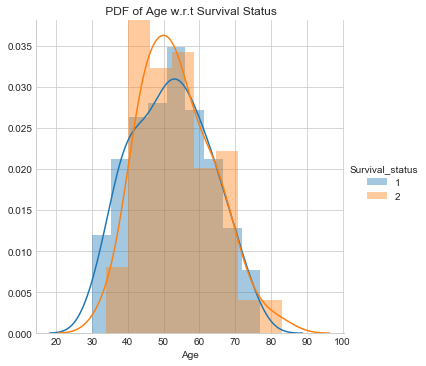

In [21]:
sns.set_style("whitegrid")
sns.FacetGrid(df_haber, hue="Survival_status", size=5).map(sns.distplot,"Age").add_legend()
plt.title(" PDF of Age w.r.t Survival Status")

**Observation :** This plot does not show any concrete idea about the survival status of patients corresponding to their age

Text(0.5,1,' PDF of Operation_Year w.r.t Operation_Year')

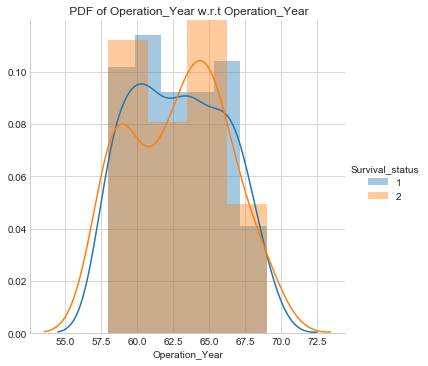

In [23]:
sns.set_style("whitegrid")
sns.FacetGrid(df_haber, hue="Survival_status", size=5).map(sns.distplot,"Operation_Year").add_legend()
plt.title(" PDF of Operation_Year w.r.t Operation_Year")

** Observation :** This plot does not help us to reach any conclusion about  the survival status of patients corresponding to the year they underwent operation 

Text(0.5,1,' PDF of Operation_Year w.r.t number of axil nodes')

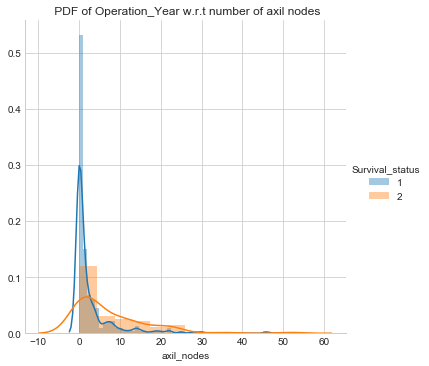

In [24]:
sns.set_style("whitegrid")
sns.FacetGrid(df_haber, hue="Survival_status", size=5).map(sns.distplot,"axil_nodes").add_legend()
plt.title(" PDF of Operation_Year w.r.t number of axil nodes")

** Observation ** - The above PDF shows that the patients had maximum chances of survival when no axil nodes were found.Also the patients who were detected within 1 to 5 axil nodes also survived .

In [28]:
#Analyze CDF for all three features / independent variables
survived = df_haber[df_haber["Survival_status"]== 1];
not_survived = df_haber[df_haber["Survival_status"]== 2];

In [30]:
print(survived.shape)
print(not_survived.shape)

(225, 4)
(81, 4)


Text(0.5,1,'  PDF/CDF of Age w.r.t not Survived cases')

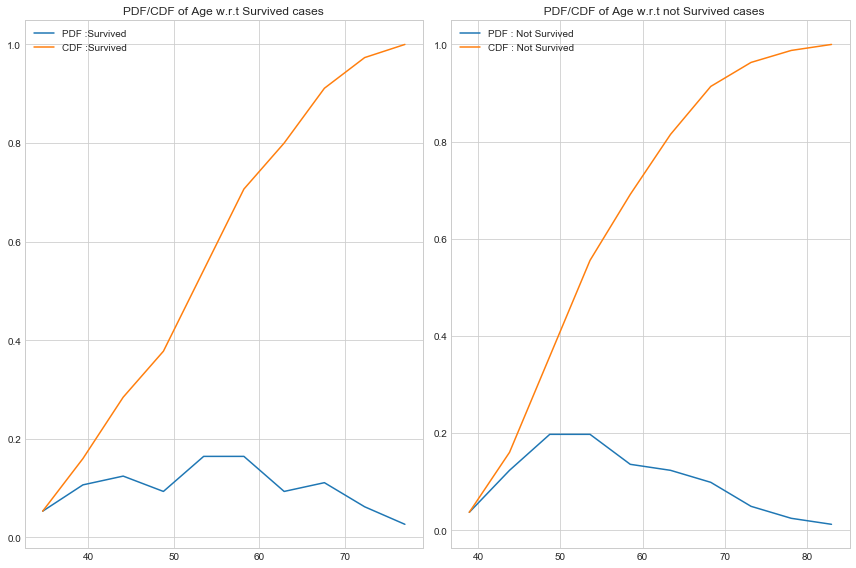

In [36]:
#CDF of Age w.r.t Survived cases
counts_survived, bin_edges_survived = np.histogram(survived["Age"], bins=10, density= True)

pdf_survived = counts_survived/(sum(counts_survived))
cdf_survived = np.cumsum(pdf_survived)

plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
plt.plot(bin_edges_survived[1:], pdf_survived,label="PDF :Survived")
plt.plot(bin_edges_survived[1:], cdf_survived,label="CDF :Survived")
plt.legend()
plt.tight_layout()
plt.title("PDF/CDF of Age w.r.t Survived cases")

#CDF of Age w.r.t Not Survived cases

counts_notsurvived, bin_edges_notsurvived = np.histogram(not_survived["Age"], bins=10, density= True)

pdf_notsurvived = counts_notsurvived/(sum(counts_notsurvived))
cdf_notsurvived = np.cumsum(pdf_notsurvived)

plt.subplot(1, 2, 2)
plt.plot(bin_edges_notsurvived[1:], pdf_notsurvived,label="PDF : Not Survived")
plt.plot(bin_edges_notsurvived[1:], cdf_notsurvived,label="CDF : Not Survived")
plt.legend()
plt.tight_layout()
plt.title("  PDF/CDF of Age w.r.t not Survived cases")


** Observation : **
    
subplot 1 : 42% of the patients who survived upto 5 or more  years after surgery were 50 years of age.
    
subplot 2 : 41 % of the patients who did not survive upto 5 years after surgery were 0f 50 years age.
    

Text(0.5,1,'  PDF/CDF of Operation_Year w.r.t not Survived cases')

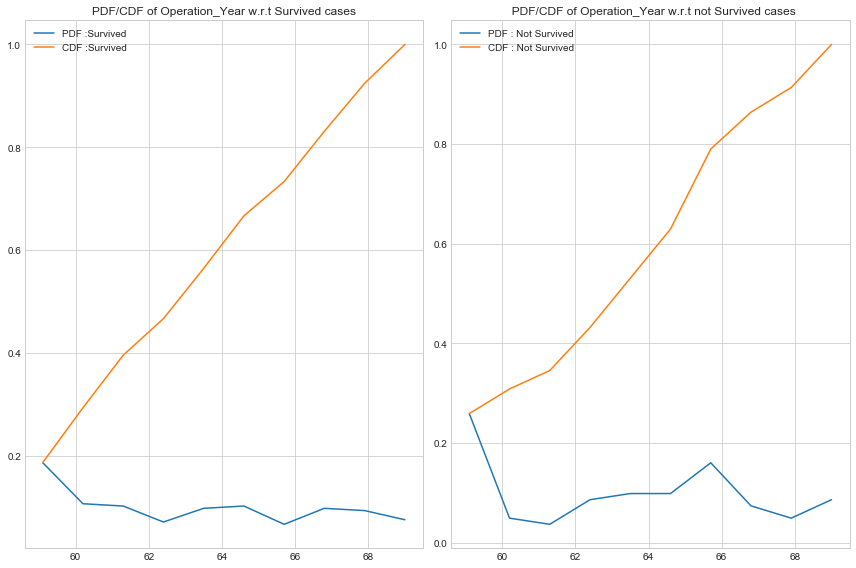

In [37]:
#CDF of Year of operation w.r.t Survived cases
counts_survived, bin_edges_survived = np.histogram(survived["Operation_Year"], bins=10, density= True)

pdf_survived = counts_survived/(sum(counts_survived))
cdf_survived = np.cumsum(pdf_survived)

plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
plt.plot(bin_edges_survived[1:], pdf_survived,label="PDF :Survived")
plt.plot(bin_edges_survived[1:], cdf_survived,label="CDF :Survived")
plt.legend()
plt.tight_layout()
plt.title("PDF/CDF of Operation_Year w.r.t Survived cases")

#CDF of Year of operation w.r.t Not Survived cases

counts_notsurvived, bin_edges_notsurvived = np.histogram(not_survived["Operation_Year"], bins=10, density= True)

pdf_notsurvived = counts_notsurvived/(sum(counts_notsurvived))
cdf_notsurvived = np.cumsum(pdf_notsurvived)

plt.subplot(1, 2, 2)
plt.plot(bin_edges_notsurvived[1:], pdf_notsurvived,label="PDF : Not Survived")
plt.plot(bin_edges_notsurvived[1:], cdf_notsurvived,label="CDF : Not Survived")
plt.legend()
plt.tight_layout()
plt.title("  PDF/CDF of Operation_Year w.r.t not Survived cases")


Text(0.5,1,'  PDF/CDF of axil_nodes w.r.t not Survived cases')

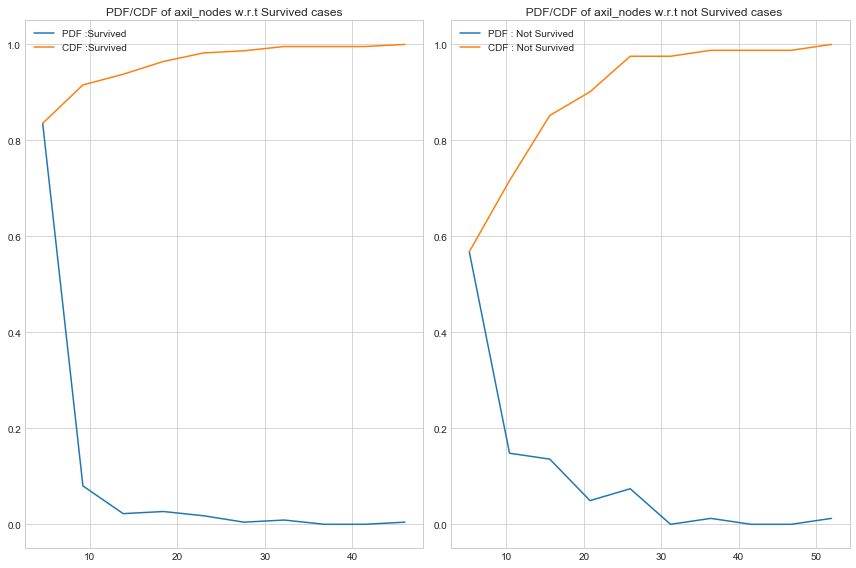

In [38]:
#CDF of axil_nodes w.r.t Survived cases
counts_survived, bin_edges_survived = np.histogram(survived["axil_nodes"], bins=10, density= True)

pdf_survived = counts_survived/(sum(counts_survived))
cdf_survived = np.cumsum(pdf_survived)

plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
plt.plot(bin_edges_survived[1:], pdf_survived,label="PDF :Survived")
plt.plot(bin_edges_survived[1:], cdf_survived,label="CDF :Survived")
plt.legend()
plt.tight_layout()
plt.title("PDF/CDF of axil_nodes w.r.t Survived cases")

#CDF of axil_nodes w.r.t Not Survived cases

counts_notsurvived, bin_edges_notsurvived = np.histogram(not_survived["axil_nodes"], bins=10, density= True)

pdf_notsurvived = counts_notsurvived/(sum(counts_notsurvived))
cdf_notsurvived = np.cumsum(pdf_notsurvived)

plt.subplot(1, 2, 2)
plt.plot(bin_edges_notsurvived[1:], pdf_notsurvived,label="PDF : Not Survived")
plt.plot(bin_edges_notsurvived[1:], cdf_notsurvived,label="CDF : Not Survived")
plt.legend()
plt.tight_layout()
plt.title("  PDF/CDF of axil_nodes w.r.t not Survived cases")


** Observation : **

subplot 1: 88% of the patients detected with 0 -8 axil nodes survived .

subplot 2 : 75 % of the patients detected with 10 axil nodes did not survive.

Text(0.5,1,'Box Plot of Survival Status w.r.t Age')

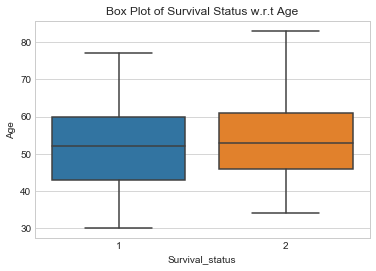

In [40]:
#BoxPlots
sns.set_style("whitegrid")
sns.boxplot(x='Survival_status', y= 'Age', data = df_haber)
plt.title("Box Plot of Survival Status w.r.t Age")

** Observation :**

Average age of patients who survived is 52 while the average age of people who did not survive is 54.

1st quartile survived age = 44

3rd quartile survied age = 60

1st quartile  not survived age = 45

3rd quartile not survied age = 61

Text(0.5,1,'Box Plot of Operation_Year w.r.t Age')

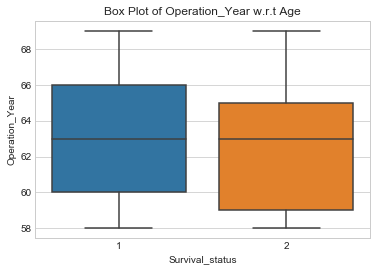

In [41]:
#Box Plot Operation_Year
sns.set_style("whitegrid")
sns.boxplot(x='Survival_status', y= 'Operation_Year', data = df_haber)
plt.title("Box Plot of Operation_Year w.r.t Age")

Text(0.5,1,'Box Plot of axil_nodes w.r.t Age')

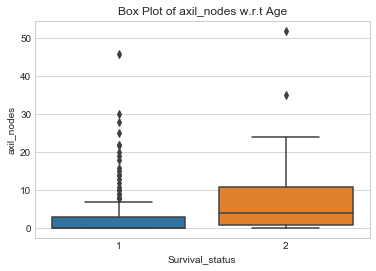

In [43]:
#Box Plot axil_node
sns.set_style("whitegrid")
sns.boxplot(x='Survival_status', y= 'axil_nodes', data = df_haber)
plt.title("Box Plot of axil_nodes w.r.t Age")

** Observation : **
    
People with zero axil nodes survived the most. Maximum axil nodes for which patients had survived is 8.

People detected with 4 axil nodes on an average did not survive.

The box plot also depicts that the data points for survived has lot of outliers